In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start= '2010-01-01' 
end='2019-12-31'

df=data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564356
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447999


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564356
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447999


In [5]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


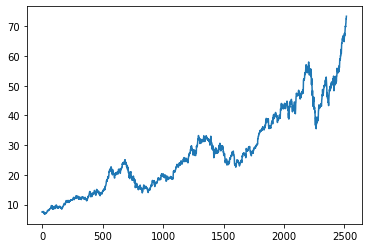

In [6]:
plt.plot(df.Close)

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

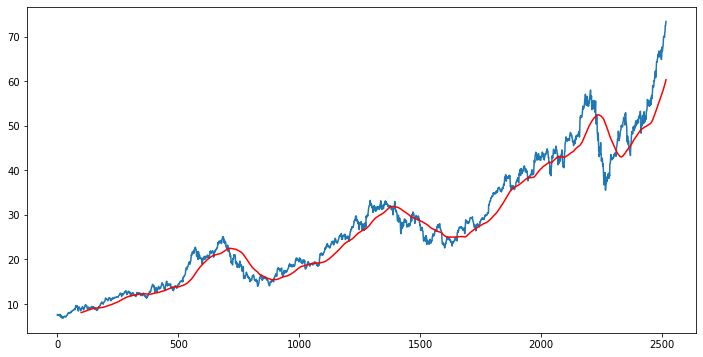

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

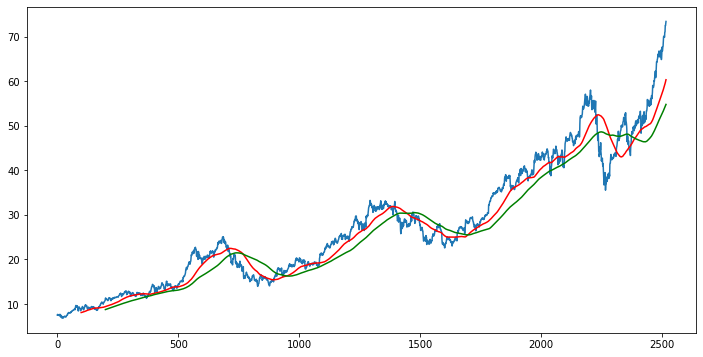

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape

(2517, 5)

In [12]:
# splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [13]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [14]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [17]:
data_training_array.shape

(1761, 1)

In [18]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
x_train, y_train= np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(1661, 100, 1)

In [20]:
# ML Model

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model=Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences= True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))



model.add(LSTM(units=80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))



model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])
history=model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 13s 170ms/step - loss: 0.0552 - mse: 0.0552
Epoch 2/50
52/52 [==============================] - 9s 172ms/step - loss: 0.0126 - mse: 0.0126
Epoch 3/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0087 - mse: 0.0087
Epoch 4/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0097 - mse: 0.0097
Epoch 5/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0090 - mse: 0.0090
Epoch 6/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0084 - mse: 0.0084
Epoch 7/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0076 - mse: 0.0076
Epoch 8/50
52/52 [==============================] - 9s 168ms/step - loss: 0.0080 - mse: 0.0080
Epoch 9/50
52/52 [==============================] - 9s 166ms/step - loss: 0.0071 - mse: 0.0071
Epoch 10/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0067 - mse: 0.0067
Epoch 11/50
52/52 [=============================

[0.05524060130119324,
 0.012565926648676395,
 0.008718459866940975,
 0.00973408855497837,
 0.009038633666932583,
 0.008410248905420303,
 0.007618846837431192,
 0.007983495481312275,
 0.00711644534021616,
 0.006743992678821087,
 0.006503166630864143,
 0.006429421715438366,
 0.00669115548953414,
 0.006853301543742418,
 0.006082707084715366,
 0.0057725743390619755,
 0.006024222820997238,
 0.005611237604171038,
 0.004972763359546661,
 0.005126310512423515,
 0.004951294977217913,
 0.004852926358580589,
 0.00471591716632247,
 0.004707966465502977,
 0.004612988792359829,
 0.004583233967423439,
 0.00457343365997076,
 0.003989300224930048,
 0.00410493416711688,
 0.004409578163176775,
 0.004972790367901325,
 0.003978999797254801,
 0.0034296726807951927,
 0.003959856927394867,
 0.0036188382655382156,
 0.003659438109025359,
 0.003418609034270048,
 0.00323547818697989,
 0.0034054836723953485,
 0.0032138749957084656,
 0.0031190451700240374,
 0.003350301180034876,
 0.0033537631388753653,
 0.003186104

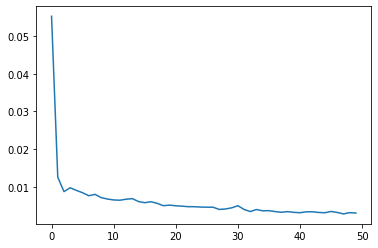

In [92]:
plt.plot(history.history['mse'])
history.history['mse']

In [158]:
model.save('keras_model.h5')

In [159]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [160]:
past_100_days=data_training.tail(100)

In [161]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [162]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [163]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [164]:
input_data.shape

(856, 1)

In [165]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [166]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [167]:
# Making Predictions

y_predicted=model.predict(x_test)

In [168]:
y_predicted.shape

(756, 1)

In [169]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [170]:
y_predicted

array([[0.11346464],
       [0.11367261],
       [0.11388955],
       [0.11410995],
       [0.11432913],
       [0.11454275],
       [0.11474773],
       [0.11494352],
       [0.11513191],
       [0.11531472],
       [0.11549526],
       [0.11567511],
       [0.11585414],
       [0.11603415],
       [0.11621648],
       [0.1164009 ],
       [0.11658718],
       [0.11677514],
       [0.11696105],
       [0.11715358],
       [0.11736181],
       [0.11759403],
       [0.11785428],
       [0.1181314 ],
       [0.11847892],
       [0.11894754],
       [0.11958793],
       [0.12045175],
       [0.12158725],
       [0.12302954],
       [0.12479541],
       [0.1268791 ],
       [0.12927121],
       [0.1319642 ],
       [0.13494046],
       [0.1381681 ],
       [0.14154   ],
       [0.14504737],
       [0.14863387],
       [0.15227966],
       [0.15594862],
       [0.15959406],
       [0.16318212],
       [0.16668868],
       [0.17009261],
       [0.17337494],
       [0.17651802],
       [0.179

In [171]:
scaler.scale_

array([0.02099517])

In [172]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

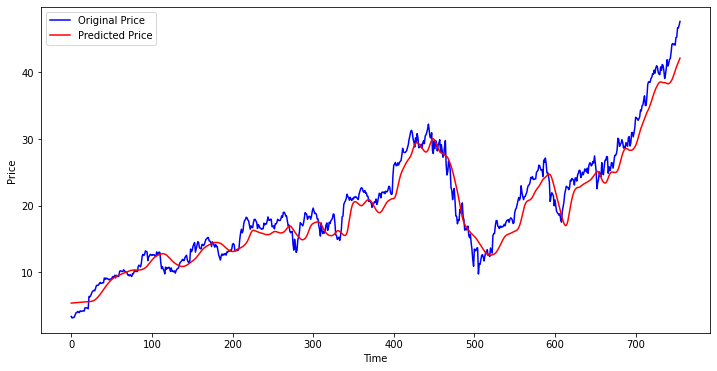

In [173]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()